# Lab 5: Evaluating Education Policy using Regression Discontinuity Design

## Methods/concepts: regression discontinuity design

**Name:** Shreya Chaturvedi

**Email:** shreyachaturvedi@hks.harvard.edu

**HUID:** 31575036

**Lab:** Thursday 3pm at HKS

**Date:** February 29th, 2024

**LAB DESCRIPTION**

In this lab, we will use *regression discontinuity design* to evaluate
an academic probation policy at a Canadian University that places
students on academic probation if their GPA falls below 1.60. The
**probation.dta** data contains student-level data from this University.
See [Exhibit 1](#Exhibit1) for an excerpt from a letter that is sent by
school administrators to students being placed on probation. For more details on the variables
included in these data, see [Table 1](#Table1). A list and description of each of the R commands needed for this lab are contained in [Table 2](#TABLE-2:-R-Commands). For
more background on the data and institutional setting, see [Lindo,
Sanders, and Oreopoulos
(2010)](https://www-aeaweb-org.ezp-prod1.hul.harvard.edu/articles?id=10.1257/app.2.2.95).

## **QUESTIONS**

1.  In this lab, we will seek to estimate the causal effect of the
    probation policy on educational outcomes (e.g., on time graduation).
    Why *don’t* we want to compare *all students* who are on probation
    with *all students* who are not on probation to evaluate this
    University’s program?

In [1]:
# QUESTION 1 Code


**Question 1 Answer**

The main reason why we do not compare all the students who are on probation with all the students who are not on probation to estimate the causal effect of the probation policy on educational outcomes such as graduation time is selection bias. In other words, students in the two different groups (probation: Y vs N) are likely to be different due to underlying factors such as motivation, abilities, or something else that causes them to self select into groups. This fundamental difference violates the identification assumption since it creates multiple channels that can affect educational outcomes other than the policy in question. 

2.  What is the “running variable” in this research design?

In [2]:
# QUESTION 2 Code


**Question 2 Answer**

The running variable in this research design is the students GPA since this variable determines whether the student is placed on probation or not according to the university's policy. 

3.  Now use the variables in the **probation.dta** file to validate the
    research design. Visual evidence is always the best evidence, so
    draw the following graphs and include them in your solutions:
    1. Binned scatter plots to check for smoothness of 2-3
        predetermined characteristics
    2. Histograms to check for a spike in the density just above or
        just below the threshold. Use at least 200 bins.


In [3]:
#clear the workspace
rm(list=ls()) # removes all objects from the environment 

#Install and load haven package
if (!require(haven)) install.packages("haven"); library(haven) 
if (!require(ggplot2)) install.packages("ggplot2"); library(ggplot2)
if (!require(tidyverse)) install.packages("tidyverse"); library(tidyverse)
if (!require(rdrobust)) install.packages("rdrobust"); library(rdrobust)
if (!require(sandwich)) install.packages("sandwich"); library(sandwich)

#Load stata data set
download.file("https://raw.githubusercontent.com/ekassos/ec50_s24/main/probation.dta", "probation.dta", mode = "wb")
dat <- read_dta("probation.dta")

# QUESTION 3 Code
#summary(dat)
dat$dist_from_cut <- dat$GPA - 1.6
#Subset data to observations in [-1.2, 1.2]
dat_narrow <- subset(dat,dist_from_cut<=1.2 & dist_from_cut>=-1.2)

Loading required package: haven

Loading required package: ggplot2

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Loading required package: tidyverse

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ tibble  2.1.1       ✔ purrr   0.3.2  
✔ tidyr   0.8.3       ✔ dplyr   0.8.0.1
✔ readr   1.3.1       ✔ stringr 1.4.0  
✔ tibble  2.1.1       ✔ forcats 0.4.0  

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: rdrobust

Loading required package: sandwich



[1] "Mass points detected in the running variable."


Warning message:
“Ignoring unknown parameters: linewidth”


[1] "Mass points detected in the running variable."


Warning message:
“Ignoring unknown parameters: linewidth”


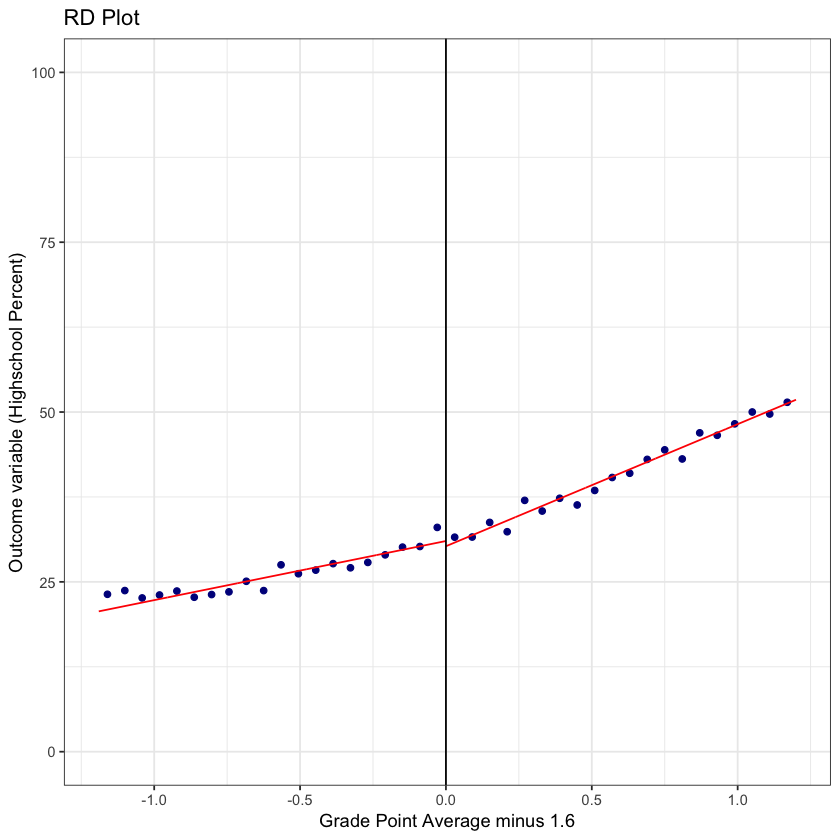

[1] "Mass points detected in the running variable."


Warning message:
“Ignoring unknown parameters: linewidth”


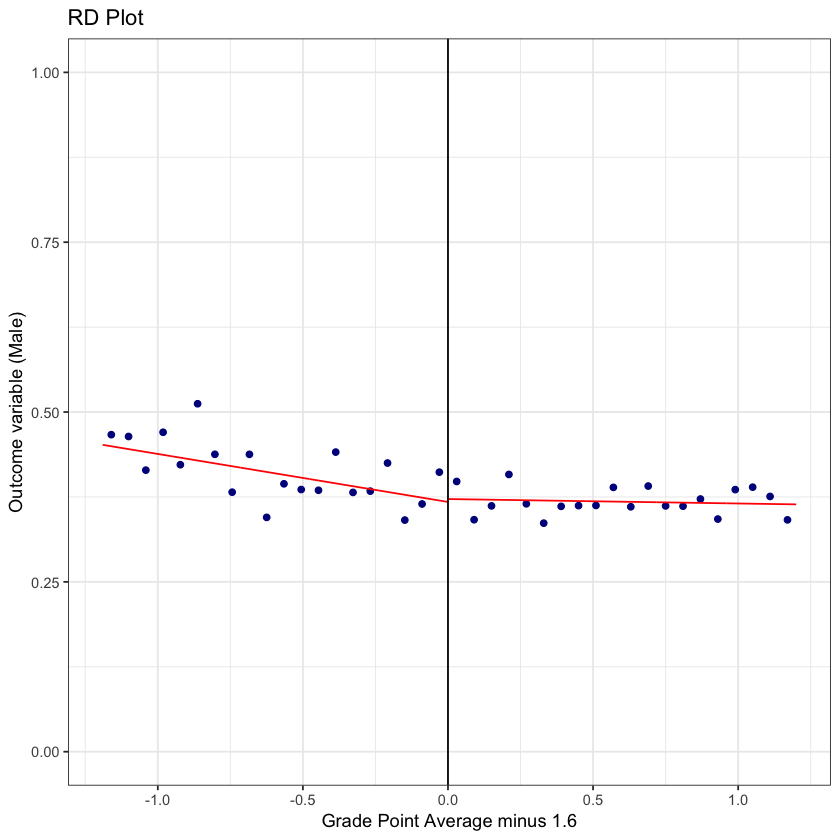

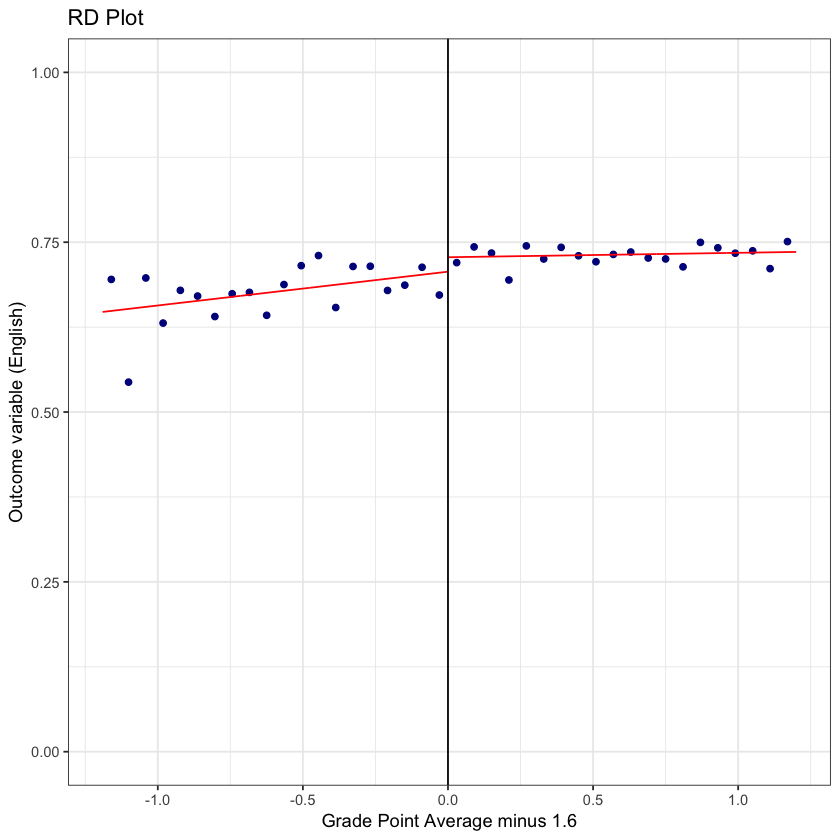

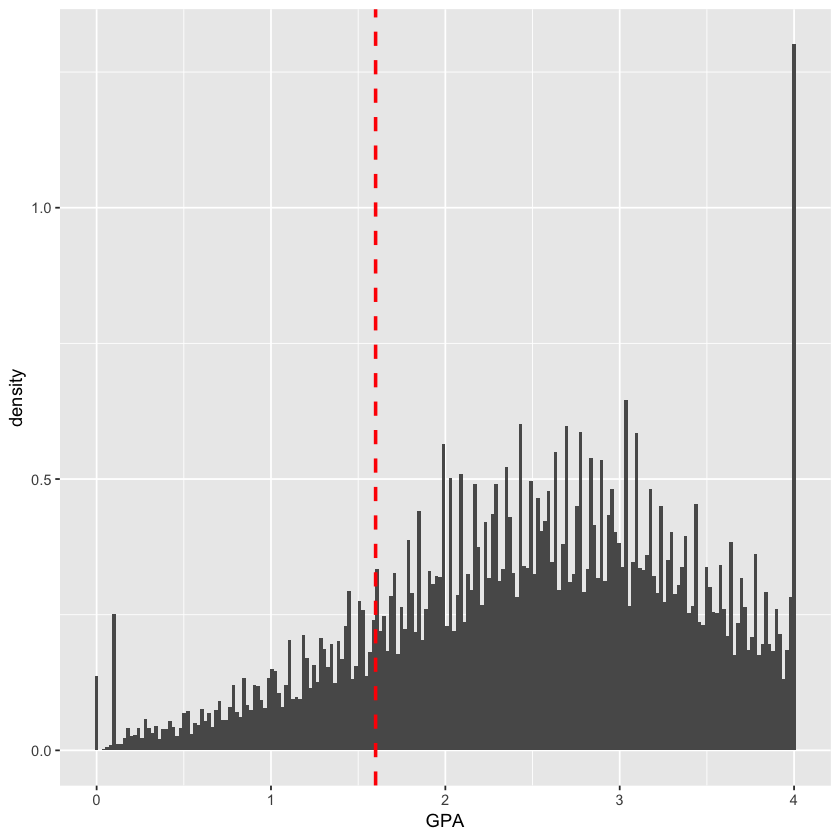

In [4]:
#draw binned scatter plot with linear fit
rdplot(dat_narrow$hsgrade_pct, #outcome variable hsgrade
      dat_narrow$dist_from_cut, #running variable GPA
        p = 1, 
        nbins = c(20, 20), 
        binselect = "es", 
        y.lim = c(0, 100), 
        x.label = "Grade Point Average minus 1.6", 
        y.label = "Outcome variable (Highschool Percent)"
      )

rdplot(dat_narrow$male, #outcome variable gender
      dat_narrow$dist_from_cut, #running variable GPA
        p = 1, 
        nbins = c(20, 20), 
        binselect = "es", 
        y.lim = c(0, 1), 
        x.label = "Grade Point Average minus 1.6", 
        y.label = "Outcome variable (Male)"
      )

rdplot(dat_narrow$english, #outcome variable englisg
      dat_narrow$dist_from_cut, #running variable GPA
        p = 1, 
        nbins = c(20, 20), 
        binselect = "es", 
        y.lim = c(0, 1), 
        x.label = "Grade Point Average minus 1.6", 
        y.label = "Outcome variable (English)"
      )

ggplot(dat) + 
  geom_histogram(aes(x=GPA, y=..density..), bins = 200) + 
  geom_vline(aes(xintercept=1.6), color="red", linetype="dashed", size=1)

**Question 3 Answer**

As we can see from the plot of three baseline characteristics (in order): Highschool Percent, English, and Male, there are no obvious jumps or discontinuities that help support our identification assumption. 

Next, there also doesnt seem to be an unsual jump in the GPA just above or below the cutoff as seen, which is reassuring too. 

4.  Now study the effect of the academic probation policy on an outcome
    of your choice, such as on-time graduation. Start with a graphical
    analysis replicating the example in [Figure 1](#Figure1) below,
    focusing on students within +/- 1.2 grade points of the 1.60 GPA
    threshold. That is, use a *bandwidth* of 1.2 grade points. Include
    your graph in your solutions.

[1] "Mass points detected in the running variable."


Warning message:
“Ignoring unknown parameters: linewidth”


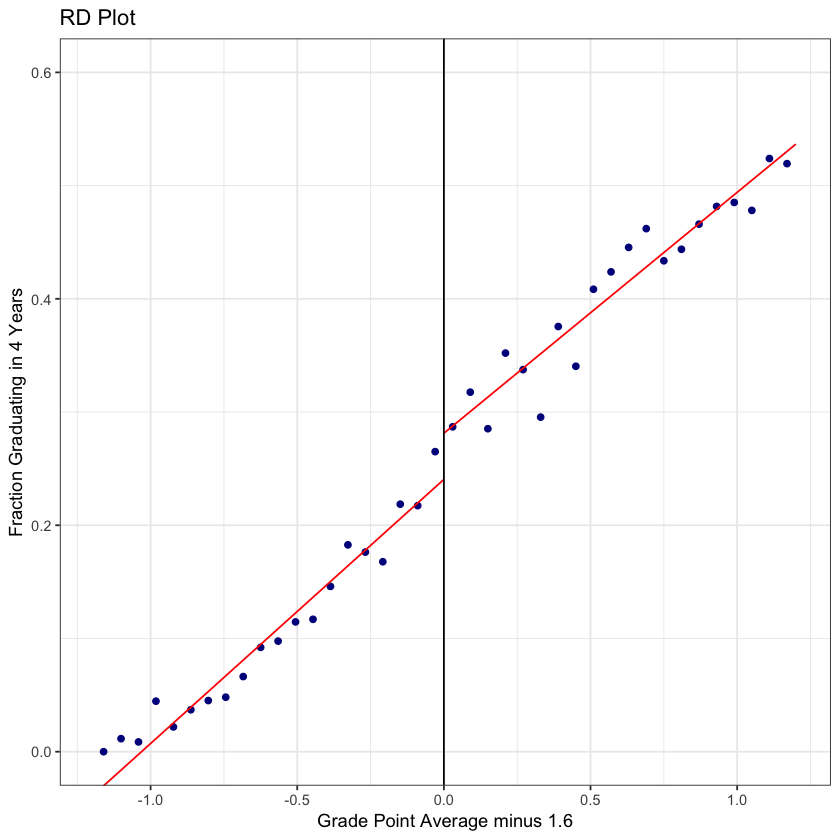

In [5]:
# QUESTION 4 Code

rdplot(dat_narrow$gradin4, #outcome variable
      dat_narrow$dist_from_cut, #running variable
        p = 1, 
        nbins = c(20, 20), 
        binselect = "es", 
        y.lim = c(0, 0.6), 
        x.label = "Grade Point Average minus 1.6", 
        y.label = "Fraction Graduating in 4 Years"
      )


**Question 4 Answer**

Graph shown above.

5.  Next we want to quantify any discontinuities that we saw in our
    binned scatter plots at the threshold. For the outcome variable that
    you examined in the previous question, focusing still on students
    within +/- 1.2 grade points of the 1.60 GPA threshold:

    1. Estimate a linear regression of the outcome variable on the
        running variable, but restrict the data to only observations
        that are to left of threshold with `GPA < 1.6` and `GPA <= 0.4`

       $$Y_{i} = \alpha_{0} + \ \alpha_{1}\text{GPA}_{i} + u_{i}\text{\ \ }\text{if}\ \text{GPA}_{i} < 1.60\text{\ and\ }\text{GPA}_{i} \geq 0.4\ $$

       Calculate the predicted value from this regression at `GPA = 1.6`. That is, calculate: ${\widehat{Y}}_{i} = {\widehat{\alpha}}_{0} + \ {\widehat{\alpha}}_{1} \times 1.6$. Include your calculation in your solutions.
    2. Run a separate regression of the outcome variable on the running variable, but restrict the data to only observations that are to the right of the threshold with `GPA >= 1.6` and `GPA <= 2.8`:

       $$Y_{i} = \gamma_{0} + \ \gamma_{1}\text{GPA}_{i} + v_{i}\text{\ \ }\text{if}\ \text{GPA}_{i} \geq 1.60\text{\ and \ }\text{GPA}_{i} \leq 2.8$$

       Calculate the predicted value from this regression at GPA = 1.6. That is, calculate: > ${\widehat{Y}}_{i} = {\widehat{\gamma}}_{0} + \ {\widehat{\gamma}}_{1} \times 1.6$ using this new regression. Include your calculation in your solutions.
    1. Calculate the difference in predicted values in a. and b. Recall
    from Lab 2 that this is called a *predicted effect*. Include your
    calculation in your solutions.

In [6]:
# QUESTION 5 Code
#Create indicator for being above probation threshold

left_regression <- lm(gradin4 ~ GPA, data = dat[dat$GPA < 1.6 & dat$GPA >= 0.4, ])
#summary(left_regression)
left_predicted <- predict(left_regression, newdata = data.frame(GPA = 1.6))
#print(left_predicted)

right_regression <- lm(gradin4 ~ GPA, data = dat[dat$GPA >= 1.6 & dat$GPA <= 2.8, ])
#summary(right_regression)
right_predicted <- predict(right_regression, newdata = data.frame(GPA = 1.6))
#print(right_predicted)

predicted_effect <- right_predicted - left_predicted
print(predicted_effect)

         1 
0.04079028 


**Question 5 Answer**

1. For the regression on the left side, we calculate the predicted outcome variable value at 1.6 GPA as -0.13273 + 1.6*0.23326 = 0.2404, which is verified as the value in the predict function.
2. Similarly, for the regression on the right side, we calculate the predicted outcome variable value at 1.6 GPA as -0.059 + 1.6*0.21278 = 0.2812, which is again verified as the value in the predict function.
3. The difference between the two is 0.0407 or 4pp, also known as the predicted effect. 

6. Next we will show that the difference you calculated above exactly
    equals the regression coefficient from a *multivariable regression*.
    The code is provided for you in [Table 2](#TABLE-2:-R-Commands) and the starter
    script. The regression is as follows:

    $$Y_{i} = \beta_{0} + \ \beta_{\text{RD}}\text{above}_{i} + \beta_{2}{dist\_ from\_ cut}_{i} + \ \beta_{3}\ \text{interaction}_{i} + \upsilon_{i}\ $$

    where $Y_{i}$ is an outcome, $\text{above}_{i}$ is an indicator for being *above* the probation GPA threshold:

    $$\text{above}_{i} = \left\{ \begin{matrix}
    1\ \text{if}\ \text{GPA}_{i} - 1.60 \geq 0 \\
    0\ \text{if}\ \text{GPA}_{i} - 1.60 < 0 \\
    \end{matrix} \right.\ $$

   The variable ${dist\_ from\_ cut}_{i} = \text{GPA}_{i} - 1.6$ is the difference between the GPA and the probation GPA threshold of 1.60. The variable $\text{interaction}_{i} = \text{above}_{i} \times {dist\_ from\_ cut}_{i}$ equals the product between the indicator $\text{above}_{i}$ and distance from the threshold ${dist\_ from\_ cut}_{i}$.

   Estimate this multivariable regression (using the code provided in [Table 2](#TABLE-2:-R-Commands) and the starter script) and confirm that ${\widehat{\beta}}_{\text{RD}}$ exactly equals your answer in 5c.

In [7]:
# QUESTION 6 Code
dat$T <- 0
dat$T[which(dat$dist_from_cut >= 0)] <- 1

#Interact dist_from_cut with non-probation
dat$interaction <- dat$dist_from_cut*dat$T
##Subset data to [-1.2,1.2] with new variables added
dat_narrow <- subset(dat,dist_from_cut<=1.2 & dist_from_cut>=-1.2)

#Estimate regression
linear <- lm(gradin4 ~ T + dist_from_cut + interaction , data = dat_narrow)

#Report coefficients and standard errors
#coeftest(linear, vcov = vcovHC(linear, type="HC1"))
summary(linear, robust = TRUE)


Call:
lm(formula = gradin4 ~ T + dist_from_cut + interaction, data = dat_narrow)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5366 -0.3898 -0.1845  0.5208  1.0161 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.24048    0.01179  20.399  < 2e-16 ***
T              0.04079    0.01452   2.809  0.00497 ** 
dist_from_cut  0.23326    0.02166  10.768  < 2e-16 ***
interaction   -0.02048    0.02456  -0.834  0.40425    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4543 on 17666 degrees of freedom
  (7882 observations deleted due to missingness)
Multiple R-squared:  0.09011,	Adjusted R-squared:  0.08996 
F-statistic: 583.2 on 3 and 17666 DF,  p-value: < 2.2e-16


**Question 6 Answer**

As shown above, the coefficient on T is exactly the same as shown above and equal to 0.04079. 

7. Using the *standard error* on the coefficient
    ${\widehat{\beta}}_{\text{RD}}$ from the regression in the previous
    question, what do you conclude about the statistical significance of
    the discontinuity at the threshold?

In [8]:
# QUESTION 7 Code



**Question 7 Answer**

The coefficient on variable T (which represents the treatment effect at the threshold) is 0.04079 with a standard error of 0.01452. The t-value for this coefficient is 2.809, and the corresponding p-value is 0.00497. Since the p value is less than 0.05,that there is strong evidence to suggest that the policy(being just above versus just below the threshold of 1.6GPA) has a statistically significant effect on the outcome variable of graduation in 4 years or on time graduation. 

8. Putting together all the analyses you did above, what do you
    conclude about the effectiveness of this college’s academic
    probation program? What caveats would you put on your conclusions?

In [9]:
# QUESTION 8 Code


**Question 8 Answer**

The analysis above indicates that the academic probation policy has a statistically significant effect on the probability of on-time graduation. In other words, the positive coefficient implies that being just above the probation threshold (thus not being on probation) increases the likelihood of graduating on time compared to those just below the threshold (who are placed on probation). However, as discussed in the lecture, there are some caveats to be added given the quasi experimental nature of the study. Simply put, the analysis does not confirm that there are no other potential confounding variables that could influence graduation rates. Further, statistical signficance is one consideration, but there might be a need for further study to understand the practical and policy significance in the context. 

9.  Create an annotated/commented do-file, .ipynb Jupyter Notebook, or
    .R file that can replicate all your analyses above. This will be the
    final code that you submit on Gradescope. The motivation for using
    do-files and .R files is described on [page 4](#Dofiles), which has
    been adapted from training materials used by [Innovations for
    Poverty Action (IPA)](https://www.poverty-action.org/) and the
    [Abdul Latif Jameel Poverty Action Lab
    (J-PAL)](https://www.povertyactionlab.org/).


**Final Submission Checklist for Lab 5**

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 49%" />
</colgroup>
<thead>
<tr class="header">
<th><strong>If you’re working with R</strong></th>
<th><strong>If you’re working with Stata</strong></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><p>Lab 5 Write-Up:</p>
<ul>
<li><p><strong>PDF</strong> of your answers. For graphs, you must save them as images (e.g., .png files) and insert them into the document.</p></li>
</ul>
<p>Lab 5 Code:</p>
<ul>
<li><p><strong>.R script file</strong>, well-annotated replicating all your analyses;<br/><br/>OR</p></li>
<li><p><strong>.ipynb file</strong></p></li>
</ul></td>
<td><p>Lab 5 Write-Up:</p>
<ul>
<li><p><strong>PDF</strong> of your answers. For graphs, you must save them as images (e.g., .png files) and insert them into the document.</p></li>
</ul>
<p>Lab 5 Code:</p>
<ul>
<li><p><strong>do-file</strong>, well-annotated replicating all your analyses;<br/><br/>AND</p></li>
<li><p><strong>log-file, not a .smcl file,</strong> with the log showing the output generated by your final do-file.</p></li>
</ul></td>
</tr>
</tbody>
</table>

***If you’re working with an .ipynb notebook***

It is likely that your .ipynb file will be greater than 1 MB in size.
Therefore, for this assignment please submit both your *well-annotated*
**.ipynb file** and **a .PDF version of this file**. The notebook should
replicate all your analyses for Lab 5 (with enough comments that a
principal investigator on a research project would be able to follow and
understand what each step of the code is doing).

## How to submit your assignment

|  |  |
|--|--|
| **Step 1** <br><br> Access the lab assignment under the “Assignments” tab on Canvas| 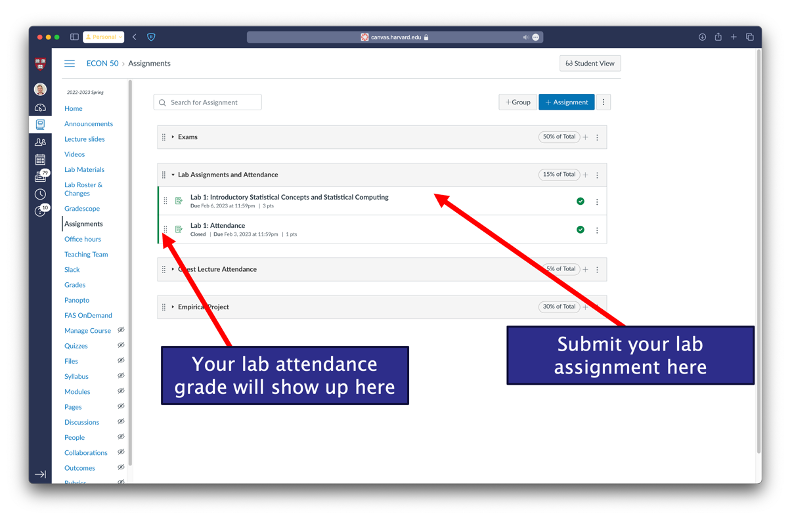 |
| **Step 2** <br><br> Access Gradescope from Canvas| 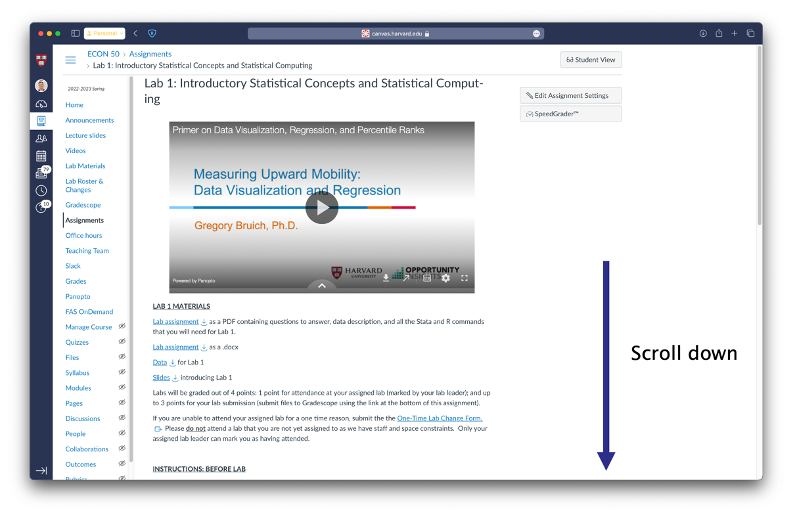 <br> 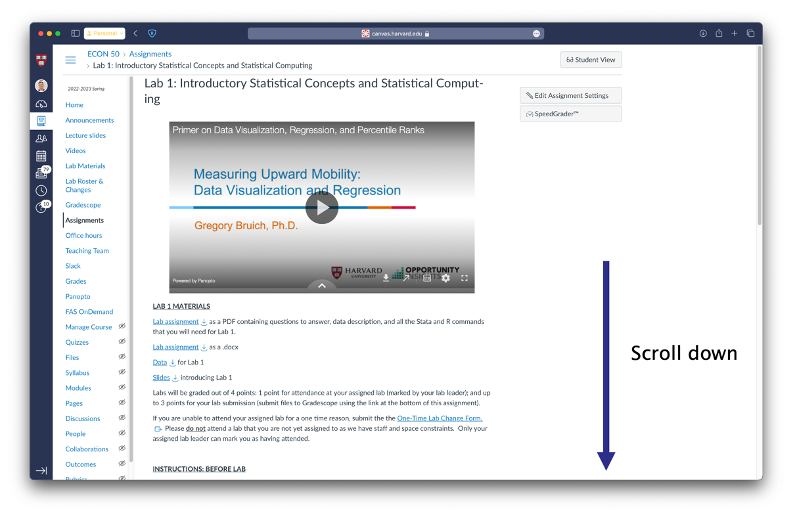|
| **Step 3** <br><br> Access the lab assignment on Gradescope| 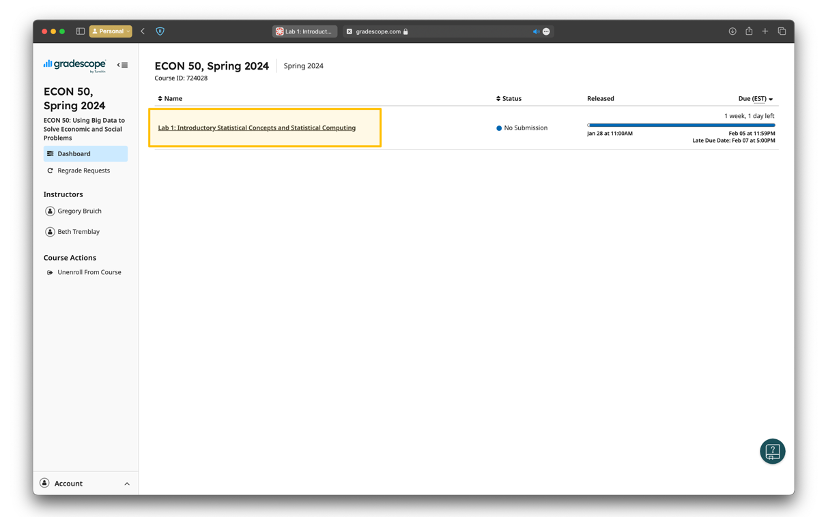 |
| **Step 4** <br><br> Upload your files<br><br> *Check [What files to submit](#What-files-to-submit) to confirm what files you need to submit.*| 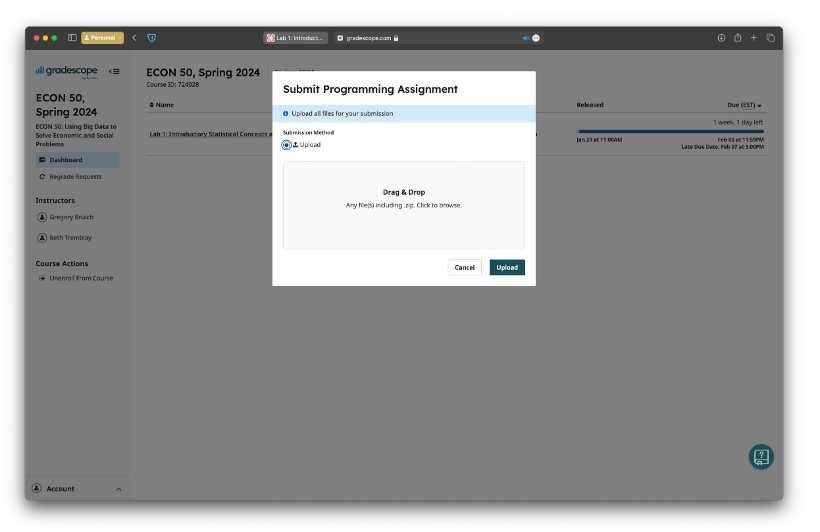 |
| **Step 5** <br><br> What you’ll see after submitting your lab assignment| 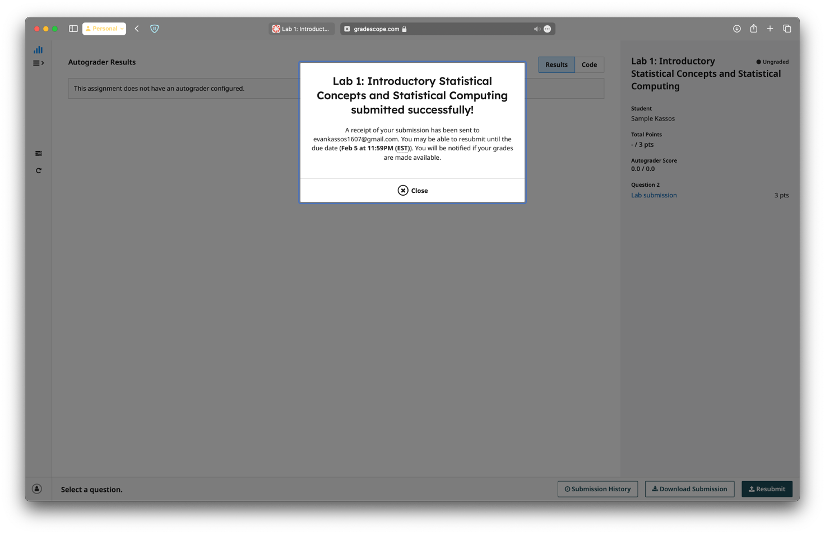 |
| **Step 6** <br><br> Check your submitted files| 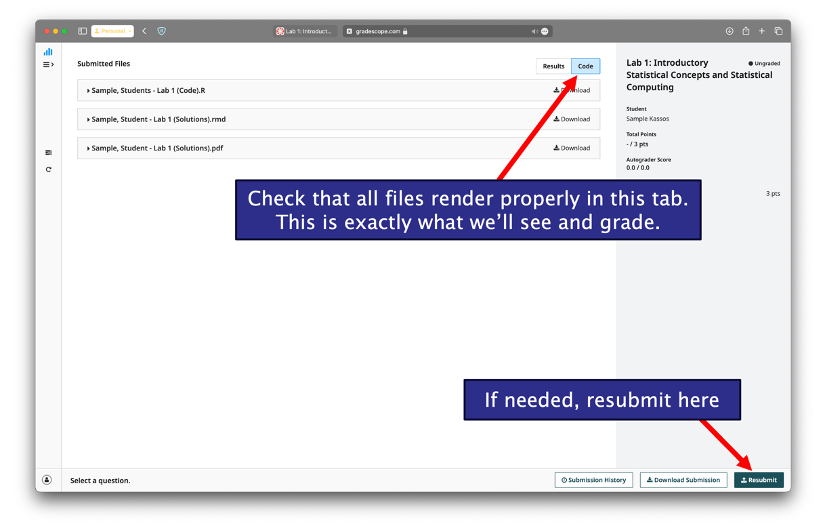 |
| **Step 7** <br><br> You’ll receive an email confirmation as well| 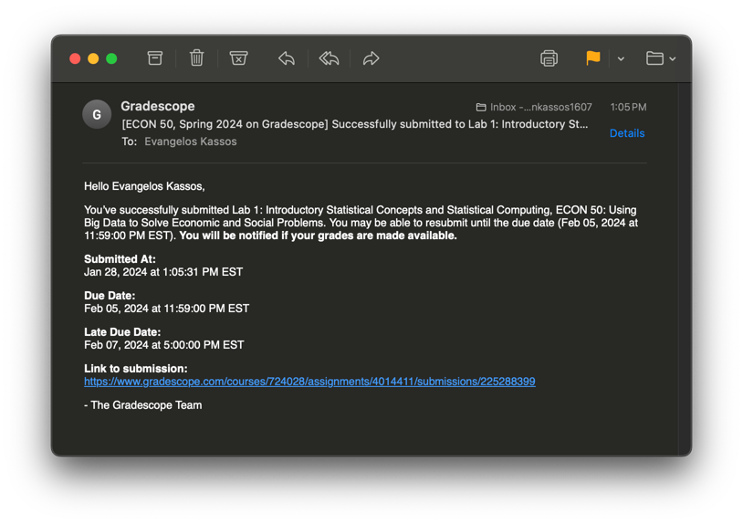 |

## What files to submit

|  |  |
|--|--|
| **If you’re using Python Notebook to write your R code, and a document editor to write your answers** <br><br> 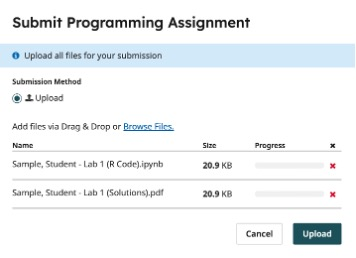| <ul><li>Submit your .ipynb R code file replicating all your analyses above (with enough comments that a principal investigator on a research project would be able to follow and understand what each step of the code is doing). We need your raw code so that we can run your code ourselves if needed.</li><li>Submit your answers as a .pdf file. **Do not submit a .doc/.docx file (Word document)**, as we are unable to read those files on Gradescope.</li></ul><br>_For graphs, always be sure to save them as images (e.g., .png files) and insert them into the answer document even if it was not explicitly asked._<br><br>**Important:** If we do not have both your .ipynb code and .pdf answer files, you will lose 1 out of the 3 lab assignment points.<br><br><span style="color:crimson">**Word of caution:**</span> <u>**Do not**</u> use Python to perform your analysis in this Lab, unless when explicitly instructed. You will receive no points if you’re not using R or Stata for your analysis.|
| **If you’re using a Python Notebook to write your R code AND to write your answers** <br><br> 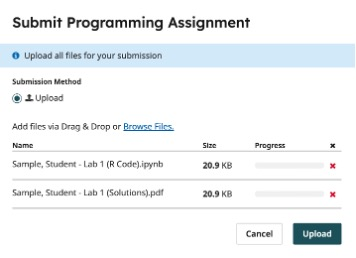| <ul><li>Submit your .ipynb R code file replicating all your analyses above (with enough comments that a principal investigator on a research project would be able to follow and understand what each step of the code is doing). We need your raw code so that we can run your code ourselves if needed.</li><li>Submit the .pdf version of your .ipynb file.</li></ul><br>_For graphs, always be sure to save them as images (either in the cell output or as separate images, such as .png files) and insert them into the answer document even if it was not explicitly asked._<br><br>**Important:** If we do not have both your .ipynb code and .pdf answer files, you will lose 1 out of the 3 lab assignment points.<br><br>**Do not submit ONLY the .ipynb file**, as we might have trouble reading your answers using those files on Gradescope.<br><br><span style="color:crimson">**Word of caution:**</span> <u>**Do not**</u> use Python to perform your analysis in this Lab, unless when explicitly instructed. You will receive no points if you’re not using R or Stata for your analysis.|png)|

## WHAT ARE DO-FILES AND .R FILES AND WHY DO WE NEED ONE?<span id="Dofiles" class="anchor"></span>

*Let’s imagine the following situation - you just found out you have to
present your results to a partner– all the averages you produced and
comparisons you made. Suppose you also found out that the data you had
used to produce all these results was not completely clean, and have
only just fixed it. You now have incorrect numbers and need to re-do
everything.*

*How would you go about it? Would you reproduce everything you did for
Lab 1 from scratch? Can you do it? How long would it take you to do?
Just re-typing all those commands into Stata or R in order and checking
them would take an hour.*

*An important feature of any good research project is that the results
should be reproducible. For Stata and R the easiest way to do this is to
create a text file that lists all your commands in order, so anyone can
re-run all your Stata or R work on a project anytime. Such text files
that are produced within Stata or linked to Stata are called do-files,
because they have an extension .do (like intro_exercise.do). Similarly,
in R, these files are called .R files because they have an extension of
.R. These files feed commands directly into Stata or R without you
having to type or copy them into the command window.*

*An added bonus is that having do-files and .R files makes it very easy
to fix your typos, re-order commands, and create more complicated chains
of commands that wouldn’t work otherwise. You can now quickly reproduce
your work, correct it, adjust it, and build on it.*

*Finally, do-files and .R files make it possible for multiple people to
work on a project, which is necessary for collaborating with others or
when you hand off a project to someone else.*

### **Exhibit 1**<br/>Excerpt of Letter Set by University to Students being Placed on Probation<span id="Exhibit1" class="anchor"></span>

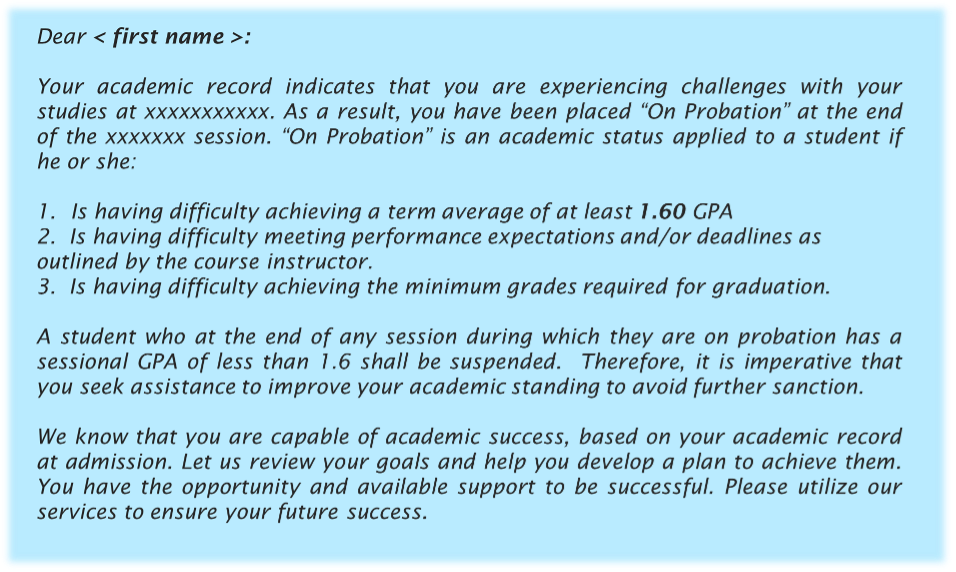

*Note:* Image is from Mosteller (1995) in his review of the history of and results from the Tennessee STAR experiment.

### **Figure 1**<br/>Fraction Graduating in Four Years versus GPA Threshold for Academic Probation<span id="Figure1" class="anchor"></span>

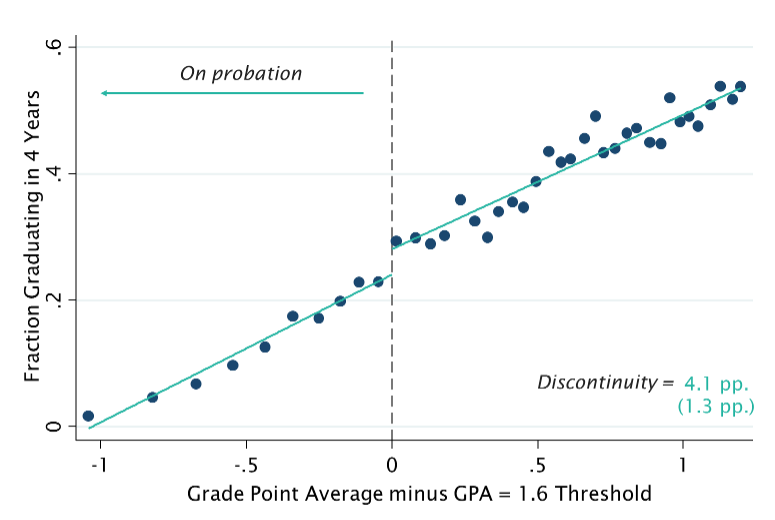

*Note:* The figure plots the fraction of students graduating in four years along the y-axis versus the student’s GPA relative to the 1.60 threshold for academic probation along the x-axis. This figure is a binned scatter plot: the blue dots show the average for all students falling into bins defined by the variable along the x-axis.  Students to the left of the dashed line are below the threshold and therefore would be placed on probation.  

## DATA DESCRIPTION, FILE: star.dta

The data consist of $N = 44,362$ college students at a Canadian
University. For more information, see Lindo, Jason M., Nicholas J.
Sanders, Philip Oreopoulos (2010) [“Ability, Gender, and Performance
Standards: Evidence from Academic
Probation,”](https://www-aeaweb-org.ezp-prod1.hul.harvard.edu/articles?id=10.1257/app.2.2.95)
*American Economic Journal: Applied Economics* 2(2): 95-117, April 2010.

**TABLE 1**<span id="Table1" class="anchor"></span>

Variable Definitions

|     |                     |                                                           |        |        |          |       |       |
|-----|---------------------|-----------------------------------------------------------|--------|--------|----------|-------|-------|
|     | Variable            | Description                                               | Obs.   | Mean   | St. Dev. | Min   | Max   |
|     | \(1\)               | \(2\)                                                     | \(3\)  | \(4\)  | \(5\)    | \(6\) | \(7\) |
| 1   | *GPA*               | Grade point average in 1st year (running variable)        | 44,362 | 2.511  | 0.895    | 0     | 4     |
| 2   | *hsgrade_pct*       | High school grade percentile (Baseline Characteristic)    | 44,362 | 50.17  | 28.86    | 1     | 100   |
| 3   | *totcredits_year1*  | Credits attempted in first year (Baseline Characteristic) | 44,362 | 4.573  | 0.511    | 3     | 6.5   |
| 4   | *age_at_entry*      | Age at entry (Baseline Characteristic)                    | 44,362 | 18.67  | 0.743    | 17    | 21    |
| 5   | *male*              | Male (Baseline Characteristic)                            | 44,362 | 0.383  | 0.486    | 0     | 1     |
| 6   | *bpl_north_america* | Born in North America (Baseline Characteristic)           | 44,362 | 0.871  | 0.335    | 0     | 1     |
| 7   | *english*           | English is first language (Baseline Characteristic)       | 44,362 | 0.714  | 0.452    | 0     | 1     |
| 8   | *loc_campus1*       | At Campus 1 (Baseline Characteristic)                     | 44,362 | 0.584  | 0.493    | 0     | 1     |
| 9   | *loc_campus2*       | At Campus 2 (Baseline Characteristic)                     | 44,362 | 0.173  | 0.379    | 0     | 1     |
| 10  | *loc_campus3*       | At Campus 3 (Baseline Characteristic)                     | 44,362 | 0.242  | 0.429    | 0     | 1     |
| 11  | *gradin4*           | Graduated by year 4 (Outcome)                             | 30,017 | 0.447  | 0.497    | 0     | 1     |
| 12  | *gradin5*           | Graduated by year 5 (Outcome)                             | 24,581 | 0.675  | 0.468    | 0     | 1     |
| 13  | *gradin6*           | Graduated by year 6 (Outcome)                             | 19,757 | 0.753  | 0.431    | 0     | 1     |
| 14  | *left_school*       | Left university after 1st evaluation (Outcome)            | 44,362 | 0.0490 | 0.216    | 0     | 1     |
| 15  | *probation_year1*   | On probation after 1st year (Outcome)                     | 44,362 | 0.160  | 0.367    | 0     | 1     |
| 16  | *suspended_ever*    | Ever suspended (Outcome)                                  | 44,362 | 0.0803 | 0.272    | 0     | 1     |
| 17  | *nextGPA*           | GPA in next enrolled term (Outcome)                       | 44,362 | 2.758  | 0.949    | 0     | 4     |
| 18  | *probation_ever*    | Ever on academic probation (Outcome)                      | 44,362 | 0.196  | 0.397    | 0     | 1     |

*Note:* Table describes variables in probation.dta.

## TABLE 2: R Commands<span id="Table3" class="anchor"></span>



<table>
<tr>
<td> <div style="width:700px"><b>R command</b> </div></td> <td> <div style="width:600px"><b>Description</b> </div> </td>
</tr>
<tr>
<td> 
    
```Rscript
#clear the workspace
rm(list=ls()) # removes all objects from the environment 

#Install and load haven package
if (!require(haven)) install.packages("haven"); library(haven) 

#Load stata data set
download.file("https://raw.githubusercontent.com/ekassos/ec50_s24/main/probation.dta", "probation.dta", mode = "wb")
dat <- read_dta("probation.dta") 

#Report detailed information on all variables 
summary(dat)
```

</td>
<td>
This sequence of commands shows how to open Stata datasets in R.  The first block of code clears the work space.  The second block of code installs and loads the “haven” package.  The third block of code downloads and loads in star.dta.
<br><br>
The summary command will report information on what is included in the data set loaded into memory, including information on the number of missing observations NAs for each variable.
</td>
</tr>
<tr>
<td> 
    
```Rscript
#Create running variable, centered at GPA = 1.60 
dat$dist_from_cut <- dat$GPA - 1.6
```

</td>
<td> 
This code shows how to create a new variable <code>dist_from_cut</code> the equals GPA minus the threshold 1.60.  
</td>
</tr>
<tr>
<td> 
    
```Rscript
#Load packages
if (!require(tidyverse)) install.packages("tidyverse"); library(tidyverse)
if (!require(rdrobust)) install.packages("rdrobust"); library(rdrobust)

#Subset data to observations in [-1.2, 1.2]
narrow <- subset(dat,dist_from_cut<=1.2 & dist_from_cut>=-1.2)

#draw binned scatter plot with linear fit
rdplot(dat_narrow$yvar, #outcome variable
      dat_narrow$dist_from_cut, #running variable
        p = 1, 
        nbins = c(20, 20), 
        binselect = "es", 
        y.lim = c(0, 0.6), 
        x.label = "Grade Point Average minus 1.6", 
        y.label = "Outcome variable (yvar)"
      )

#Save graph
ggsave("figure1_linear.png")

```

</td>
<td> 
The first command installs rdrobust, which only has to be done once.  
<br><br>
The second command subsets the data to only observations with <code>dist_from_cut</code> between -1.2 and 1.2.  
<br><br>
The third block of code produces a binned scatter plot of yvar against dist_from_cut with a linear best fit line.  The options shown are:<br>
<code>p = 1, #p = 1 is linear best fit line. p = 2 is quadratic</code><br>
<code>nbins = c(20, 20), #number of bins on each side of threshold</code><br>
<code>binselect = "es", #option to use "equal spaced" binning</code><br>
<code>y.lim = c(0, 0.6), #Set y-axis scale</code><br>
<code>x.label = "Grade Point Average minus 1.6", #x axis label</code><br>
<code>y.label = "Outcome variable (yvar)" #y axis label</code><br><br>
The fourth block of code saves the graph.  
</td>
</tr>
<tr>
<td> 
    
```Rscript
#Histogram using ggplot
if (!require(tidyverse)) install.packages("tidyverse"); library(tidyverse)
if (!require(ggplot2)) install.packages("ggplot2"); library(ggplot2)

ggplot(dat) +  geom_histogram(aes(x=yvar, y=..density..))
ggsave("histogram_yvar.png")

#Use 200 bins, overriding default
ggplot(dat) +  geom_histogram(aes(x=yvar, y=..density..), bins = 200)
```

</td>
<td> 
These commands create and save histograms of a variable “yvar” using ggplot.  First start by installing the tidyverse library.  Then use ggplot to draw the graph.  The ggsave() line saves the graph as a .png file.  The last line overrides the default to show 200 bins by adding the bins = 200 option.
</td>
</tr>
<tr>
<td> 
    
```Rscript
#Load packages
if (!require(sandwich)) install.packages("sandwich"); library(sandwich)
if (!require(lmtest)) install.packages("lmtest"); library(lmtest)

#Create running variable, centered at GPA = 1.60 
dat$dist_from_cut <- dat$GPA - 1.6

#Create indicator for being above probation threshold
dat$T <- 0
dat$T[which(dat$dist_from_cut >= 0)] <- 1

#Interact dist_from_cut with non-probation
dat$interaction <- dat$dist_from_cut*dat$T

##Subset data to [-1.2,1.2] with new variables added
dat_narrow <- subset(dat,dist_from_cut<=1.2 & dist_from_cut>=-1.2)


#Estimate regression
linear <- lm(yvar ~ T + dist_from_cut + interaction , data = dat_narrow)

#Report coefficients and standard errors
coeftest(linear, vcov = vcovHC(linear, type="HC1"))
```

</td>
<td> 
These commands show how to run a regression to quantify the discontinuity in yvar at the 1.60 GPA threshold.  We first create a new variable <code>dist_from_cut</code> the equals GPA minus the threshold 1.60.  
<br><br>
We then generate an indicator variable T for <code>dist_from_cut</code> being positive.  We next generate the a variable interaction that is the product between <code>dist_from_cut</code> and the indicator.  
<br><br>
Then we subset the data to a new data frame with <code>dist_from_cut</code> between -1.2 and 1.2.  
<br><br>
Finally, we run a regression of yvar on these three variables, restricting the regression to observations with <code>dist_from_cut</code> between -1.2 and 1.2.  The coefficient of interest is coefficient on T, the indicator for being above probation threshold.  
<br><br>
The <code>type=HC1</code> option computes standard errors that allow for unequal variances.
</td>
</tr>
</table>